In [78]:
import pandas as pd
import numpy as np
import pickle as pckl

from sklearn import linear_model
import statsmodels.api as sm

In [84]:
df = pckl.load(open('ARK_sorted_data_0122.pckl','rb'))

In [81]:
df = df.drop(columns = ['comment_upvotes', 'comment_funny_votes', 'early_review', 'playtime_2weeks',
                               'last_played', 'games_owned', 'author_reviews', 'purchased', 'free', 'cleaned_reviews'])

In [85]:
len(df)

476

In [11]:
feats = df.drop(columns = ['time_of_review', 'review', 'upvoted', 'time_of_review_unix',
                           'upvoted_roc'])
feats = feats[1000:-1000]

X = feats.drop(columns = ['1day_forcast'])
Y = feats['1day_forcast'].copy()

dates = df['time_of_review']

#feats_2 = df[['neu_window', 'pos_window', 'neu_window_fullroc', 'pos_window_fullroc']][1000:-1000]

#y = df['1day_forcast'][1000:-1000].copy()

In [32]:
Y_classes = []

for i in range(len(Y)):
    if Y.iloc[i] > -0.000956 + 0.044507:
        Y_classes.append(1)
    elif Y.iloc[i] < -0.000956 - 0.044507:
        Y_classes.append(-1)
    else:
        Y_classes.append(0)
        
Y_classification = pd.DataFrame({'class': Y_classes})

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

train, test = train_test_split(feats, test_size=0.2)

In [37]:
x_train = train.drop(columns = '1day_forcast')
x_test = test.drop(columns = '1day_forcast')

y_train = train['1day_forcast'].copy()
y_test = test['1day_forcast'].copy()

In [134]:
y_train_classes = []

for i in range(len(y_train)):
    if y_train.iloc[i] > -0.001625 + 0.044140:
        y_train_classes.append(1)
    elif y_train.iloc[i] < -0.001625 - 0.044140:
        y_train_classes.append(-1)
    else:
        y_train_classes.append(0)
        
y_train_df = pd.DataFrame({'class': y_train_classes})

y_test_classes = []

for i in range(len(y_test)):
    if y_test.iloc[i] > -0.001625 + 0.044140:
        y_test_classes.append(1)
    elif y_test.iloc[i] < -0.001625 - 0.044140:
        y_test_classes.append(-1)
    else:
        y_test_classes.append(0)
        
y_test_df = pd.DataFrame({'class': y_test_classes})

In [136]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1, solver='sag',
                         multi_class='multinomial', max_iter = 500).fit(x_train, y_train_df.values)
                                                                        
predictions = clf.predict(x_test)

#clf.predict_proba(X[:2, :]) 

clf.score(x_test, y_test_df.values)


/Users/tylerblair/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tylerblair/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.5091808581486063

In [140]:
clf.coef_[-1]

array([-1.71489599e-01, -4.04830943e-02,  1.90403227e-02, -9.23436186e-02,
       -7.28898740e-02, -3.27135641e-04, -2.13802843e-03,  1.63075123e-03,
        1.35277511e-03,  1.44170997e-03, -3.16436273e-05])

In [137]:
y_train_df['class'].value_counts(0)

 0    41973
 1    21085
-1    21026
Name: class, dtype: int64

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [97]:
set(predictions)

{0}

In [27]:
regression = linear_model.LinearRegression()
regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
coeffs = regression.coef_

In [30]:
coeffs

array([ 1.20952886e-02, -7.93665851e-01, -3.46788803e-02, -3.70159323e-01,
        4.89479896e-02, -1.04313589e+01, -7.76054487e-01,  1.75532630e+00,
        1.55515493e+00,  2.68087552e-05,  5.47754865e-06])

In [21]:
# with statsmodels
X = sm.add_constant(feats) # adding a constant
 
model = sm.OLS(y, feats).fit()
predictions = model.predict(feats) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           1day_forcast   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     588.0
Date:                Thu, 24 Jan 2019   Prob (F-statistic):               0.00
Time:                        16:43:47   Log-Likelihood:             1.8190e+05
No. Observations:              105106   AIC:                        -3.638e+05
Df Residuals:                  105095   BIC:                        -3.637e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
percent_window          0.0052    

-0.5553634133142367

In [29]:
y = df['1day_forcast']

In [32]:
a = y.describe()

In [36]:
a.std

<bound method Series.std of count    107106.000000
mean         -0.000956
std           0.044507
min          -0.555363
25%          -0.014393
50%          -0.000043
75%           0.014409
max           0.359193
Name: 1day_forcast, dtype: float64>

In [10]:
for i in range(len(feats)):
    if feats['1day_forcast'].iloc[i] > -0.000956 + 0.044507:
        feats['1day_forcast'].iloc[i]  = 1
    elif feats['1day_forcast'].iloc[i] < -0.000956 - 0.044507:
        feats['1day_forcast'].iloc[i]  = -1
    else:
        feats['1day_forcast'].iloc[i]  = 0

/Users/tylerblair/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


KeyboardInterrupt: 

In [5]:
#pckl.dump(y, open('forecast_1stdev.pckl', 'wb'))

In [ ]:
train_test_dummies = pd.get_dummies(feats, columns=['percent_window', 'neu_window', 'neg_window', 'pos_window',
       'comp_window', 'neu_window_fullroc', 'neg_window_fullroc',
       'pos_window_fullroc', 'comp_window_fullroc', '1day_delta', '7day_delta',
       '1day_forcast'])

In [19]:
feats.columns

Index(['percent_window', 'neu_window', 'neg_window', 'pos_window',
       'comp_window', 'neu_window_fullroc', 'neg_window_fullroc',
       'pos_window_fullroc', 'comp_window_fullroc', '1day_delta', '7day_delta',
       '1day_forcast'],
      dtype='object')

In [12]:
from sklearn.model_selection import train_test_split

x_train_sub, x_validation_sub, y_train_sub, y_validation_sub = train_test_split(x_train, y_train, random_state=0)

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [16]:
# train with Gradient Boosting algorithm
# compute the accuracy scores on train and validation sets when training with different learning rates

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(x_train_sub, y_train_sub)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(x_train_sub, y_train_sub)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(x_validation_sub, y_validation_sub)))
    print()

ValueError: Unknown label type: 'continuous'

In [37]:
import matplotlib.pyplot as plt
import plot_reviews
import importlib
importlib.reload(plot_reviews)

<module 'plot_reviews' from '/Users/tylerblair/Documents/insight/plot_reviews.py'>

In [19]:
df = df.rename({'1day_forecast': '1day_forcast'})
df.head()

,time_of_review,review,upvoted,time_of_review_unix,percent_window,upvoted_roc,neu_window,neg_window,pos_window,comp_window,neu_window_fullroc,neg_window_fullroc,pos_window_fullroc,comp_window_fullroc,1day_delta,7day_delta,1day_forcast
0,2015-06-02 22:29:25,"Its really good, only down side is you cant fo...",True,1.433284e+09,1.0,0.000000,1.000000,0.000000,0.584581,0.820883,0.000000,0.000000,0.000000,0.000000,0,0,-0.264151
1,2015-06-02 22:30:07,This game manages to make you feel all sorts o...,True,1.433284e+09,1.0,0.541599,0.500000,0.000000,0.292290,0.410441,-1.000000,0.000000,-1.000000,-1.000000,1,1,-0.264151
2,2015-06-02 22:31:01,LOVE THIS !!!!,True,1.433284e+09,1.0,0.722132,0.690387,0.107083,0.287884,0.601778,-0.412817,0.489796,-0.676717,-0.355885,2,2,-0.263858
3,2015-06-02 22:35:36,At the point of this recommendation being made...,True,1.433285e+09,1.0,0.812399,0.594881,0.080312,0.768914,0.753996,-0.405119,0.275510,0.315327,-0.081481,3,3,-0.262404
4,2015-06-02 22:36:41,"""Since *that game we all know of"" vanished the...",True,1.433285e+09,1.0,0.866559,0.678652,0.112437,0.704434,0.817021,-0.257079,0.308571,0.164020,-0.003763,4,4,-0.262115


In [36]:
params = {'game': 'ARK',
          'window_days': 5,
          'save_df': True}

columns = ['percent_window']
plot_name = 'percent_window'

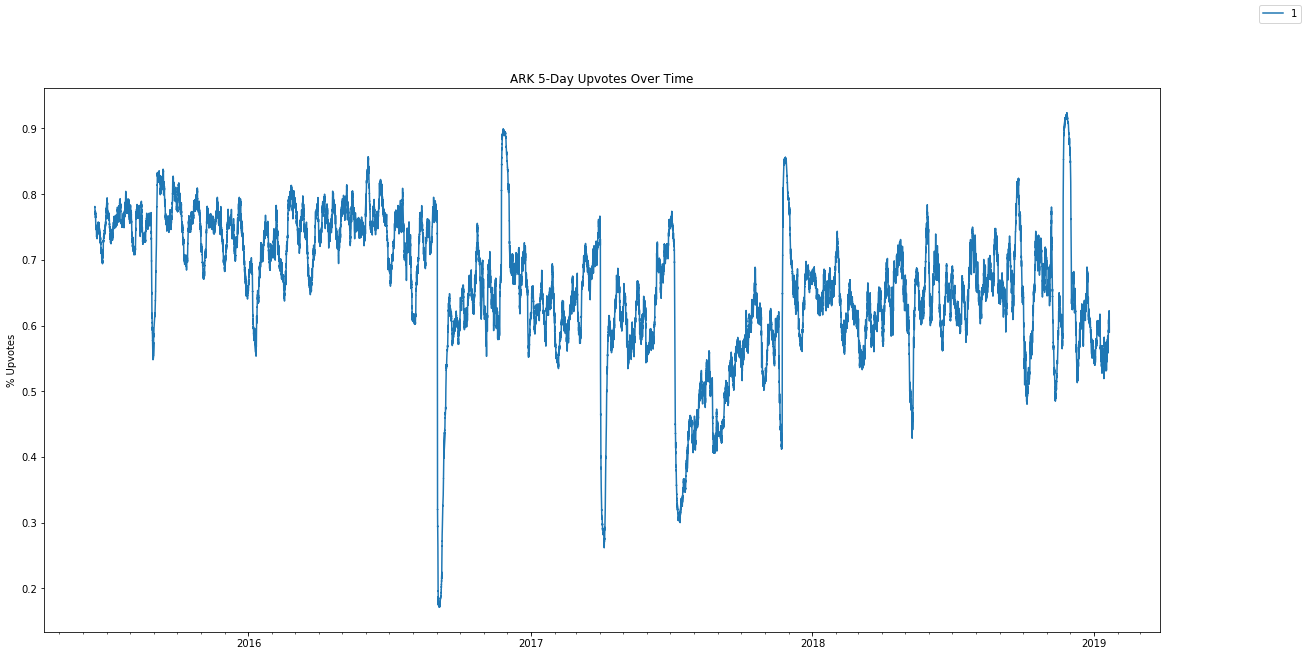

In [39]:
a = plot_reviews.plot(df, params, columns, plot_name)

In [25]:
a.legend('1day_forecast', loc='upper right')
a.show()

/Users/tylerblair/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


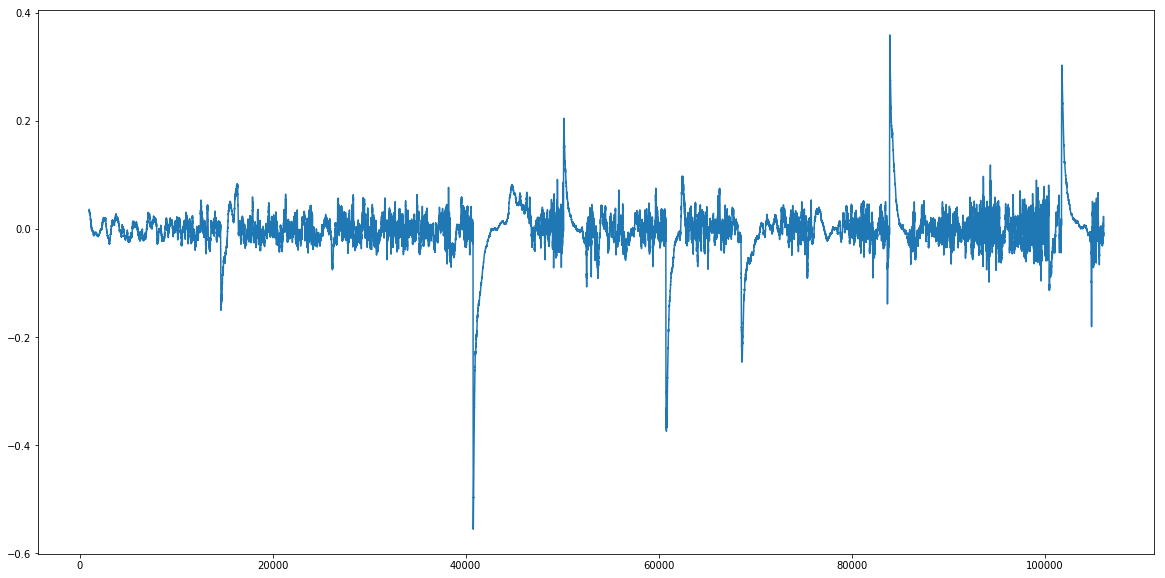

In [68]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(Y)

In [70]:
y_shift = Y-Y.shift(1)

In [71]:
df['1day_deriv'] = y_shift

In [75]:
neg_forecasts = df[(df['1day_deriv'] < 0) & (df['1day_forcast'] < -0.08)]

In [83]:
len(df)

476

In [76]:
#pckl.dump(neg_forecasts, open('neg_forecasts_14day.pckl','wb'))

/Users/tylerblair/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/tylerblair/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  from ipykernel import kernelapp as app


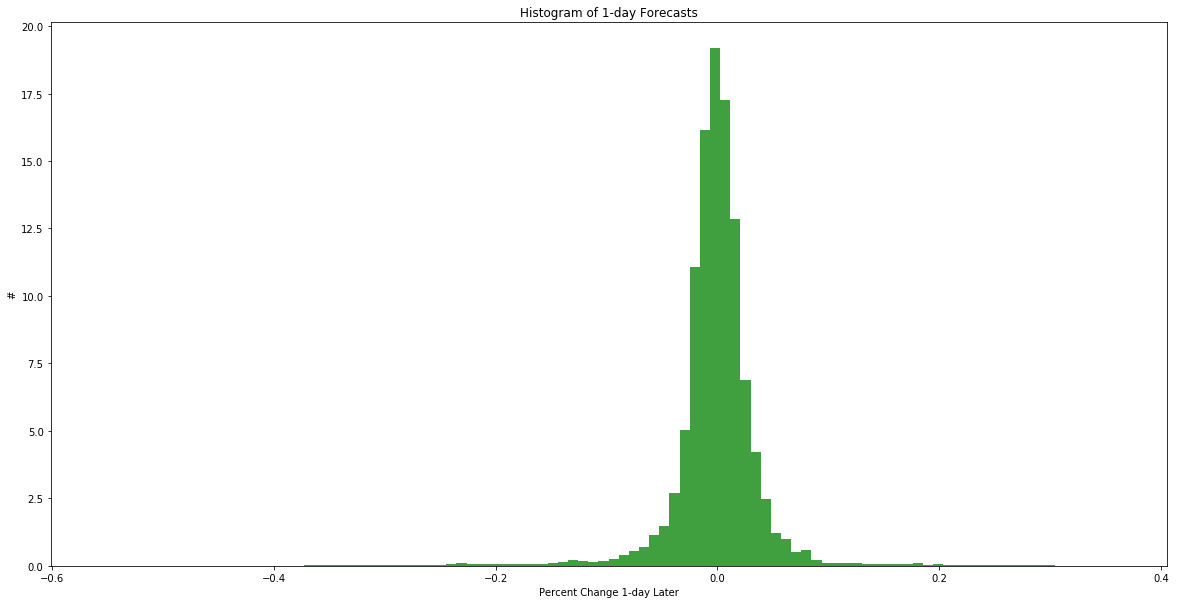

In [49]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

mu, sigma = 100, 15

# the histogram of the data
fig = plt.figure(figsize=(20,10))
n, bins, patches = plt.hist(Y, 100, normed=1, facecolor='green', alpha=0.750)
plt.xlabel('Percent Change 1-day Later')
plt.ylabel('#')
plt.title('Histogram of 1-day Forecasts')

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

In [50]:
fig.savefig('1-day_forecast_hist.png')

In [107]:
y_df = pd.DataFrame({'delta': Y})

In [109]:
y_df.describe()

,delta
count,105106.000000
mean,-0.001625
std,0.044140
min,-0.555363
25%,-0.014604
50%,-0.000253
75%,0.013969
max,0.359193
